Saving 1.txt to 1.txt
Saving 2.txt to 2.txt
Saving 3.txt to 3.txt
Коэффициент корреляции Пирсона: -0.988347934973259
t-статистика: 64.27990939530646
Критическое значение t: 1.984467454426692
Гипотеза H0 отвергается: коэффициент корреляции значимо отличается от нуля.


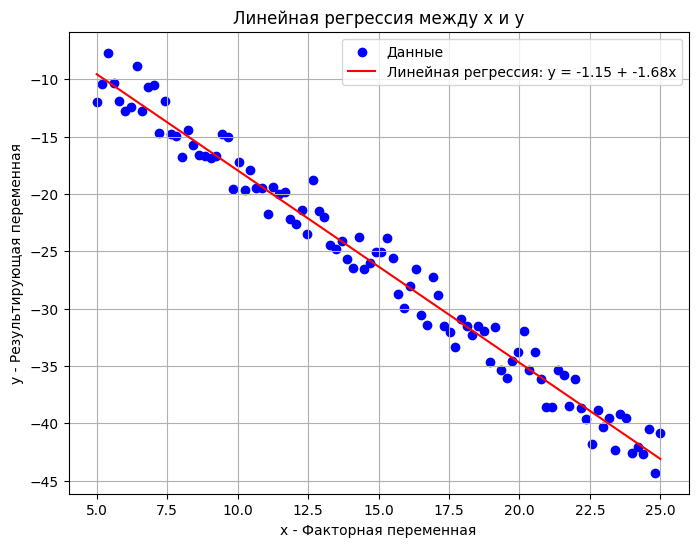

F-статистика: 4131.906751868775
Критическое значение F: 3.938111078003371
Гипотеза H0 отвергается: Модель адекватна.
t-статистика для x: -64.2799093953062
t-статистика для y: -2.7432760038421176
Критическое значение t: 1.984467454426692
Коэффициент x значимо отличается от нуля.
Коэффициент y значимо отличается от нуля.
Доверительный интервал для a: [-1.9830320034184628, -0.32249161012526417]
Доверительный интервал для b: [-1.7299337272259228, -1.6268224609369348]


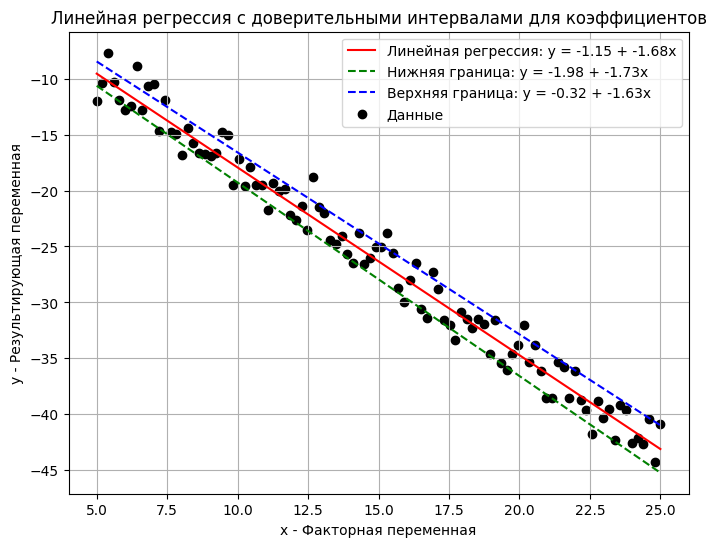

Прогнозное значение y для x = 28.0: -48.15
Прогнозный интервал для y: [-51.26, -45.04]


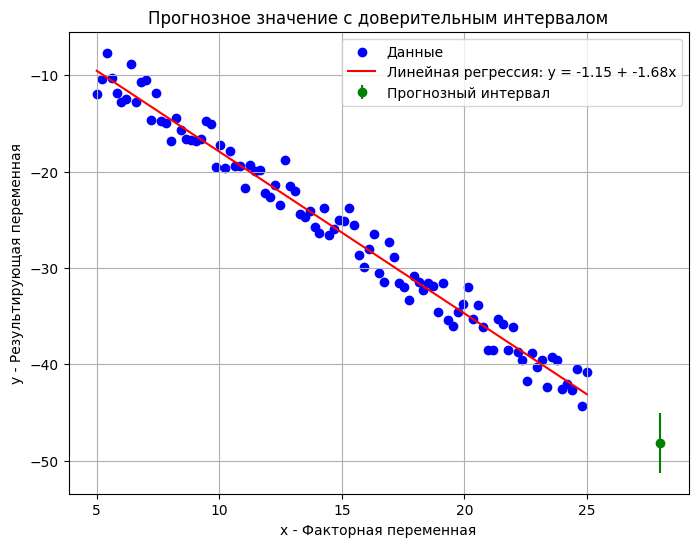

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

from google.colab import files
files.upload()

df = pd.read_csv('1.txt', header=None)
x = df[0].values.reshape(-1,1)
y = df[1].values

#print(x)
#print(y)

#Корреляция
correlation = df[0].corr(df[1])
print(f'Коэффициент корреляции Пирсона: {correlation}')
#По шкале Чеддока корреляция весьма высокая

#Проверить статистическую значимость коэффициента корреляции Пирсона с помощью 𝑡-статистики
n = len(x)
t_stat = (abs(correlation) * np.sqrt(n - 2)) / np.sqrt(1 - correlation**2)
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha / 2, df=n - 2)
print(f't-статистика: {t_stat}')
print(f'Критическое значение t: {t_critical}')
if t_stat > t_critical:
    print('Гипотеза H0 отвергается: коэффициент корреляции значимо отличается от нуля.')
else:
    print('Нет оснований отвергать гипотезу H0: коэффициент корреляции не отличается от нуля.')

#Построить линейную регрессию между столбцами, оценить значение коэффициентов линейной зависимости
model = LinearRegression()
model.fit(x, y)
a = model.intercept_
b = model.coef_[0]
y_pred = model.predict(x)
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Данные')
plt.plot(x, y_pred, color='red', label=f'Линейная регрессия: y = {a:.2f} + {b:.2f}x')
plt.xlabel('x - Факторная переменная')
plt.ylabel('y - Результирующая переменная')
plt.title('Линейная регрессия между x и y')
plt.legend()
plt.grid(True)
plt.show()

#Оценить адекватность модели с использованием критерия Фишера
n = len(y)
k = 1  #Один предиктор
x_mean = np.mean(x)
y_mean = np.mean(y)
SST = np.sum((y - y_mean) ** 2)  #Общая сумма квадратов
SSR = np.sum((y_pred - y_mean) ** 2)  #Объяснённая сумма квадратов
SSE = np.sum((y - y_pred) ** 2)  #Остаточная сумма квадратов
F_stat = (SSR / k) / (SSE / (n - k - 1))
alpha = 0.05
F_critical = stats.f.ppf(1 - alpha, dfn=k, dfd=n - k - 1)
print(f'F-статистика: {F_stat}')
print(f'Критическое значение F: {F_critical}')
if F_stat > F_critical:
    print('Гипотеза H0 отвергается: Модель адекватна.')
else:
    print('Нет оснований отвергать гипотезу H0: Модель неадекватна.')

#Оценить значимость полученных коэффициентов линейной регрессии
x_var = np.sum((x - x_mean) ** 2)
SE_b = np.sqrt(SSE / (n - 2)) / np.sqrt(x_var)
SE_a = np.sqrt(SSE / (n - 2)) * np.sqrt(1/n + (x_mean ** 2) / x_var)
t_stat_b = b / SE_b
t_stat_a = a / SE_a
t_critical = stats.t.ppf(1 - alpha / 2, df=n - 2)
print(f't-статистика для x: {t_stat_b}')
print(f't-статистика для y: {t_stat_a}')
print(f'Критическое значение t: {t_critical}')
if abs(t_stat_b) > t_critical:
    print('Коэффициент x значимо отличается от нуля.')
else:
    print('Нет оснований отвергать гипотезу H0 для коэффициента x.')

if abs(t_stat_a) > t_critical:
    print('Коэффициент y значимо отличается от нуля.')
else:
    print('Нет оснований отвергать гипотезу H0 для коэффициента y.')

#Построить доверительные интервалы для полученных коэффициентов
sigma_squared = SSE / (n - k - 1)
x_var = np.var(x, ddof=1)
se_b = np.sqrt(sigma_squared / (n * x_var))
se_a = np.sqrt(sigma_squared * (1/n + x_mean**2 / (n * x_var)))
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha / 2, df=n - k - 1)
b = model.coef_[0]
a = model.intercept_
b_lower = b - t_critical * se_b
b_upper = b + t_critical * se_b
a_lower = a - t_critical * se_a
a_upper = a + t_critical * se_a
print(f'Доверительный интервал для a: [{a_lower}, {a_upper}]')
print(f'Доверительный интервал для b: [{b_lower}, {b_upper}]')
y_pred_lower = a_lower + b_lower * x
y_pred_upper = a_upper + b_upper * x
plt.figure(figsize=(8, 6))
plt.plot(x, y_pred, color='red', label=f'Линейная регрессия: y = {a:.2f} + {b:.2f}x')
plt.plot(x, y_pred_lower, color='green', linestyle='--', label=f'Нижняя граница: y = {a_lower:.2f} + {b_lower:.2f}x')
plt.plot(x, y_pred_upper, color='blue', linestyle='--', label=f'Верхняя граница: y = {a_upper:.2f} + {b_upper:.2f}x')
plt.scatter(x, y, color='black', label='Данные')
plt.xlabel('x - Факторная переменная')
plt.ylabel('y - Результирующая переменная')
plt.title('Линейная регрессия с доверительными интервалами для коэффициентов')
plt.legend()
plt.grid(True)
plt.show()

#Оценить интервал прогноза для линейной модели на 𝜟𝒙 = 3 значения вперед
x_new = np.max(x) + 3
y_pred_new = model.predict(np.array([[x_new]]))[0]
s_y = np.sqrt(SSE / (n - 2))  # Стандартная ошибка регрессии
x_var = np.sum((x - x_mean) ** 2)
t_critical = stats.t.ppf(1 - alpha / 2, df=n - 2)
E = t_critical * s_y * np.sqrt(1 + 1/n + (x_new - x_mean)**2 / x_var)
y_pred_lower = y_pred_new - E
y_pred_upper = y_pred_new + E
print(f'Прогнозное значение y для x = {x_new}: {y_pred_new:.2f}')
print(f'Прогнозный интервал для y: [{y_pred_lower:.2f}, {y_pred_upper:.2f}]')
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Данные')
plt.plot(x, y_pred, color='red', label=f'Линейная регрессия: y = {a:.2f} + {b:.2f}x')
plt.errorbar(x_new, y_pred_new, yerr=[[y_pred_new - y_pred_lower], [y_pred_upper - y_pred_new]], fmt='o', color='green', label='Прогнозный интервал')
plt.xlabel('x - Факторная переменная')
plt.ylabel('y - Результирующая переменная')
plt.title('Прогнозное значение с доверительным интервалом')
plt.legend()
plt.grid(True)
plt.show()

F-статистика Чоу: 63614.65809534498
Критическое значение F: 3.8888529328918806
Гипотеза H0 отвергается: следует разделить выборки.

Модель для первой группы:
Коэффициент линейной регрессии: 2.8630369226103163
Свободный член: 1.8443065457544563

Модель для второй группы:
Коэффициент линейной регрессии: -1.42402154295594
Свободный член: -0.34011441737662196


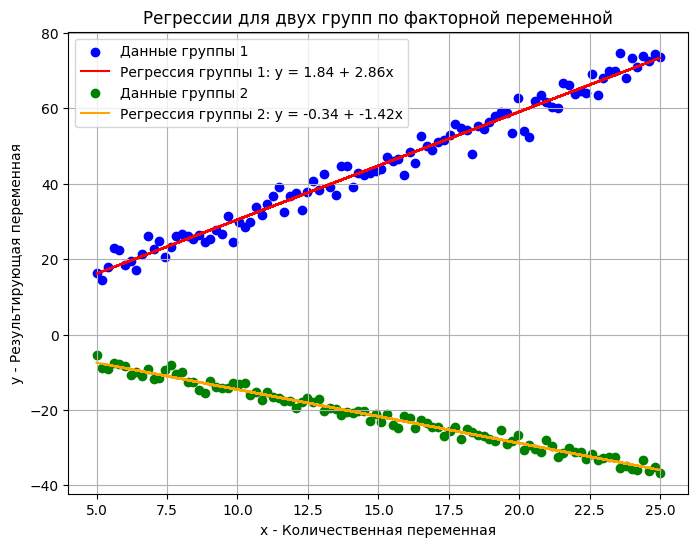

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

df = pd.read_csv('2.txt', header=None)
X = df[0]  #Количественная факторная переменная
Y = df[3]  #Результирующая переменная
factor1 = df[1]  #Качественная факторная переменная 1
factor2 = df[2]  #Качественная факторная переменная 2

group1 = df[df[1] == df[1].unique()[0]]
group2 = df[df[1] == df[1].unique()[1]]

# Разделение данных на две группы по качественной переменной
X1 = group1[0].values.reshape(-1,1)  # Количественная переменная для первой группы
Y1 = group1[3].values  # Результирующая переменная для первой группы
X2 = group2[0].values.reshape(-1,1)  # Количественная переменная для второй группы
Y2 = group2[3].values  # Результирующая переменная для второй группы

#Тест Чоу
#Построение общей регрессии (без разбиения на группы)
X_all = X.values.reshape(-1, 1)
model_all = LinearRegression()
model_all.fit(X_all, Y)
y_pred_all = model_all.predict(X_all)
SSE_all = np.sum((Y - y_pred_all) ** 2)

#Построение двух отдельных регрессий для каждой группы
#Модель 1 для первой группы
model1 = LinearRegression()
model1.fit(X1, Y1)
y_pred1 = model1.predict(X1)
SSE1 = np.sum((Y1 - y_pred1) ** 2)

#Модель 2 для второй группы
model2 = LinearRegression()
model2.fit(X2, Y2)
y_pred2 = model2.predict(X2)
SSE2 = np.sum((Y2 - y_pred2) ** 2)

#Вычисление статистики для теста Чоу
n1, n2 = len(X1), len(X2)
SSE_combined = SSE1 + SSE2
k = 1  #Количество коэффициентов (один предиктор)

F_chow = ((SSE_all - SSE_combined) / k) / (SSE_combined / (n1 + n2 - 2 * k))
alpha = 0.05
F_critical = stats.f.ppf(1 - alpha, dfn=k, dfd=n1 + n2 - 2 * k)

print(f'F-статистика Чоу: {F_chow}')
print(f'Критическое значение F: {F_critical}')
if F_chow > F_critical:
    print('Гипотеза H0 отвергается: следует разделить выборки.')
else:
    print('Нет оснований отвергать гипотезу H0: разделение выборки не требуется.')

#Построение регрессионных моделей для каждой группы
print("\nМодель для первой группы:")
print(f'Коэффициент линейной регрессии: {model1.coef_[0]}')
print(f'Свободный член: {model1.intercept_}')

print("\nМодель для второй группы:")
print(f'Коэффициент линейной регрессии: {model2.coef_[0]}')
print(f'Свободный член: {model2.intercept_}')
plt.figure(figsize=(8, 6))
plt.scatter(X1, Y1, color='blue', label='Данные группы 1')
plt.plot(X1, y_pred1, color='red', label=f'Регрессия группы 1: y = {model1.intercept_:.2f} + {model1.coef_[0]:.2f}x')

plt.scatter(X2, Y2, color='green', label='Данные группы 2')
plt.plot(X2, y_pred2, color='orange', label=f'Регрессия группы 2: y = {model2.intercept_:.2f} + {model2.coef_[0]:.2f}x')

plt.xlabel('x - Количественная переменная')
plt.ylabel('y - Результирующая переменная')
plt.title('Регрессии для двух групп по факторной переменной')
plt.legend()
plt.grid(True)
plt.show()

Свободный член (a): -15.704146810276733
Коэффициент при x (b): 3.3974284561768715


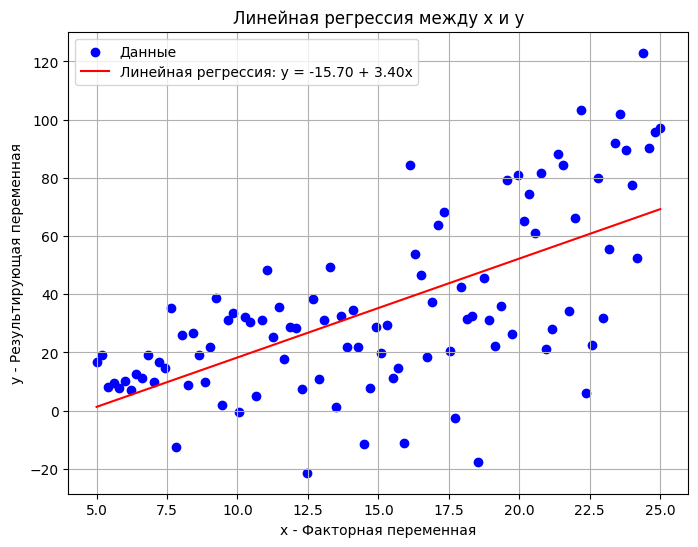

F-статистика: 72.17078337826385
Критическое значение F: 3.938111078003371
Гипотеза H0 отвергается: Модель адекватна.
t-статистика для b: 8.495338920741409
t-статистика для a: -2.439996528641152
Критическое значение t: 1.984467454426692
Коэффициент b значимо отличается от нуля.
Свободный член a значимо отличается от нуля.


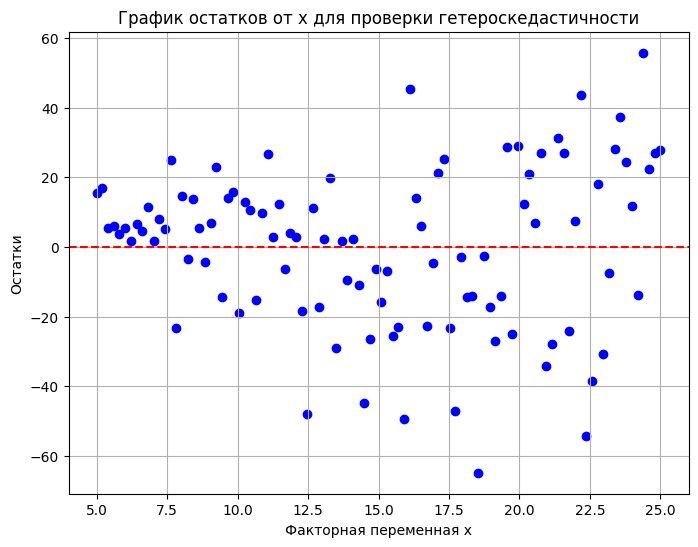

Тест Спирмена: Коэффициент корреляции = 0.0324032403240324, p-значение = 0.7489360589843896
Нет оснований отвергать гипотезу H0: корреляция незначима. Гетероскедастичность не обнаружена.
Тест Гольдфельда-Квандта: Статистика = 5.037218188732092, p-значение = 1.8678384944568374e-08
Гипотеза H0 отвергается: остатки имеют неоднородную дисперсию. Гетероскедастичность обнаружена.
Коэффициент корреляции Пирсона: 0.6512357158353101


In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import het_goldfeldquandt

df = pd.read_csv('3.txt', header=None)

#Построить линейную регрессию, оценить значения коэффициентов модели.
x = df[0].values.reshape(-1, 1)
y = df[1].values
model = LinearRegression()
model.fit(x, y)

a = model.intercept_
b = model.coef_[0]

print(f'Свободный член (a): {a}')
print(f'Коэффициент при x (b): {b}')
y_pred = model.predict(x)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Данные')
plt.plot(x, y_pred, color='red', label=f'Линейная регрессия: y = {a:.2f} + {b:.2f}x')
plt.xlabel('x - Факторная переменная')
plt.ylabel('y - Результирующая переменная')
plt.title('Линейная регрессия между x и y')
plt.legend()
plt.grid(True)
plt.show()

#Оценить значимость полученных коэффициентов и адекватность модели.
n = len(y)
k = 1  #Один предиктор (факторная переменная)
SST = np.sum((y - np.mean(y)) ** 2)  #Общая сумма квадратов
SSR = np.sum((y_pred - np.mean(y)) ** 2)  #Объяснённая сумма квадратов
SSE = np.sum((y - y_pred) ** 2)  #Остаточная сумма квадратов

F_stat = (SSR / k) / (SSE / (n - k - 1))
alpha = 0.05
F_critical = stats.f.ppf(1 - alpha, dfn=k, dfd=n - k - 1)
print(f'F-статистика: {F_stat}')
print(f'Критическое значение F: {F_critical}')
if F_stat > F_critical:
    print('Гипотеза H0 отвергается: Модель адекватна.')
else:
    print('Нет оснований отвергать гипотезу H0: Модель неадекватна.')

y_mean = np.mean(y)
S_err = np.sqrt(SSE / (n - 2))  #Стандартная ошибка для модели
x_mean = np.mean(x)
t_stat_b = b / (S_err / np.sqrt(np.sum((x - x_mean) ** 2)))  #t-статистика для коэффициента b
t_stat_a = a / (S_err * np.sqrt(np.sum(x ** 2) / (n * np.sum((x - x_mean) ** 2))))  #t-статистика для коэффициента a
t_critical = stats.t.ppf(1 - alpha / 2, df=n - 2)  #Критическое значение t
print(f't-статистика для b: {t_stat_b}')
print(f't-статистика для a: {t_stat_a}')
print(f'Критическое значение t: {t_critical}')
if abs(t_stat_b) > t_critical:
    print('Коэффициент b значимо отличается от нуля.')
else:
    print('Коэффициент b незначим.')

if abs(t_stat_a) > t_critical:
    print('Свободный член a значимо отличается от нуля.')
else:
    print('Свободный член a незначим.')

#Двумя способами (тест Спирмена и тест Гольдфельда-Квандта) определить, присутствует ли в данных гетероскедастичность.
residuals = y - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(x, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Факторная переменная x')
plt.ylabel('Остатки')
plt.title('График остатков от x для проверки гетероскедастичности')
plt.grid(True)
plt.show()

#Тест Спирмена (корреляция остатков и факторной переменной)
spearman_corr, spearman_p_value = stats.spearmanr(x.flatten(), residuals)
print(f'Тест Спирмена: Коэффициент корреляции = {spearman_corr}, p-значение = {spearman_p_value}')
if spearman_p_value < 0.05:
    print('Гипотеза H0 отвергается: есть значимая корреляция остатков с факторной переменной. Гетероскедастичность обнаружена.')
else:
    print('Нет оснований отвергать гипотезу H0: корреляция незначима. Гетероскедастичность не обнаружена.')

#Тест Гольдфельда-Квандта
gq_stat, gq_p_value, _ = het_goldfeldquandt(residuals, x, split=0.3)
print(f'Тест Гольдфельда-Квандта: Статистика = {gq_stat}, p-значение = {gq_p_value}')
if gq_p_value < 0.05:
    print('Гипотеза H0 отвергается: остатки имеют неоднородную дисперсию. Гетероскедастичность обнаружена.')
else:
    print('Нет оснований отвергать гипотезу H0: дисперсия однородна. Гетероскедастичность не обнаружена.')


correlation = df[0].corr(df[1])
print(f'Коэффициент корреляции Пирсона: {correlation}')